# Module 9 Challenge
### Doris B. Cohen - May 2020

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

#pip install flask
from flask import Flask

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
import calendar

In [4]:
#export FLASK_APP=app.py
import sys
!{sys.executable} -m pip install flask

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import extract

In [6]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

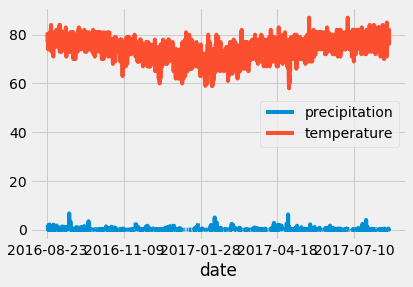

In [11]:
# Design a query to retrieve the last 12 months of precipitation and temperature data and plot the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp, Measurement.tobs)
#print(results.all())

# Save the query results as a Pandas DataFrame and set the index to the date column
results = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).filter(Measurement.date >= prev_year).all()
#print (results)

# Sort the dataframe by date
df = pd.DataFrame(results, columns=['date','precipitation','temperature'])
df.set_index(df['date'], inplace=True)
df = df.sort_index()
#print(df.to_string(index=False))

# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation and temperature data
df.describe()

,precipitation,temperature
count,2021.000000,2230.000000
mean,0.177279,74.590583
std,0.461190,4.611667
min,0.000000,58.000000
25%,0.000000,72.000000
50%,0.020000,75.000000
75%,0.130000,78.000000
max,6.700000,87.000000


In [13]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [14]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [16]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
print(results)

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

In [17]:
#Section added
df = pd.DataFrame(results, columns=['tobs'])
print(df)

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


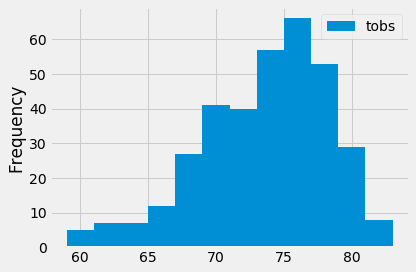

In [18]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
df.plot.hist(bins=12)
plt.tight_layout()

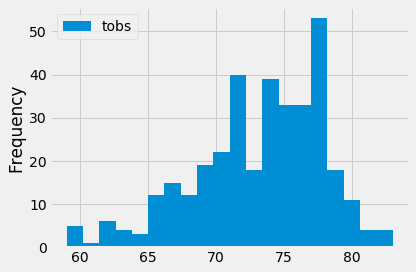

In [19]:
# Plot at a different scale
df.plot.hist(bins=20)
plt.tight_layout()

In [20]:
# New Flask app instance
app = Flask(__name__)

In [21]:
# Create flask routes
@app.route('/')
def hello_world():
    return 'Hello world'

In [22]:
# Access to this info will be on your local computer. Go to an internet browser after running Flask
localhost:5000

# Challenge

Backgroundm--
Coming from the mainland, you know how variable the weather can be in the summer and winter. Your investors want to ensure that there are enough customers between seasons to sustain the business throughout the year.

Objectives--
The goals of this challenge are for you to:
    Determine key statistical data about the month of June.
    Determine key statistical data about the month of December.
    Compare your findings between the month of June and December.
    Make 2 or 3 recommendations for further analysis.
    Share your findings in the Jupyter Notebook.

Instructions--
Complete the following steps.
 1. Identify key statistical data in June across all of the stations and years using the describe() function.
 2. Identify key statistical data in December across all stations and years using the describe() function.
 3. Share your findings in the Jupyter Notebook with a few sentences describing the key differences in weather between June and December and 2-3 recommendations for further analysis.

## June background information

In [23]:
# Results for the months of June, across all years
results_june = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).filter(extract('month', Measurement.date)==6).all()
results_june

[('2010-06-01', 0.0, 78.0),
 ('2010-06-02', 0.01, 76.0),
 ('2010-06-03', 0.0, 78.0),
 ('2010-06-04', 0.0, 76.0),
 ('2010-06-05', 0.0, 77.0),
 ('2010-06-06', 0.0, 78.0),
 ('2010-06-07', 0.0, 77.0),
 ('2010-06-08', 0.0, 78.0),
 ('2010-06-09', 0.0, 78.0),
 ('2010-06-10', 0.0, 79.0),
 ('2010-06-11', 0.0, 78.0),
 ('2010-06-12', 0.0, 78.0),
 ('2010-06-13', 0.0, 78.0),
 ('2010-06-14', 0.0, 77.0),
 ('2010-06-15', 0.0, 78.0),
 ('2010-06-16', 0.0, 78.0),
 ('2010-06-17', 0.0, 77.0),
 ('2010-06-18', 0.0, 77.0),
 ('2010-06-19', 0.0, 82.0),
 ('2010-06-20', 0.0, 78.0),
 ('2010-06-21', 0.0, 78.0),
 ('2010-06-22', 0.0, 78.0),
 ('2010-06-23', 0.0, 78.0),
 ('2010-06-24', 0.0, 78.0),
 ('2010-06-25', 0.0, 77.0),
 ('2010-06-26', 0.02, 76.0),
 ('2010-06-27', 0.0, 78.0),
 ('2010-06-28', 0.0, 78.0),
 ('2010-06-29', 0.0, 78.0),
 ('2010-06-30', 0.0, 78.0),
 ('2011-06-01', 0.07, 77.0),
 ('2011-06-02', 0.0, 78.0),
 ('2011-06-03', 0.56, 73.0),
 ('2011-06-04', 0.89, 70.0),
 ('2011-06-05', 0.0, 76.0),
 ('2011-06-06',

In [24]:
# Create a dataframe to show June results
resultsjune_temp = pd.DataFrame(results_june, columns=['results_june','precipitation', 'temperature'])
resultsjune_temp

,results_june,precipitation,temperature
0,2010-06-01,0.00,78.0
1,2010-06-02,0.01,76.0
2,2010-06-03,0.00,78.0
3,2010-06-04,0.00,76.0
4,2010-06-05,0.00,77.0
...,...,...,...
1695,2017-06-26,0.02,79.0
1696,2017-06-27,0.10,74.0
1697,2017-06-28,0.02,74.0
1698,2017-06-29,0.04,76.0


## Instruction 1 - Identify key statistical data in June across all of the stations and years using the describe() function.

In [25]:
# Statistical data for June months
resultsjune_temp.describe()

,precipitation,temperature
count,1574.000000,1700.000000
mean,0.136360,74.944118
std,0.335731,3.257417
min,0.000000,64.000000
25%,0.000000,73.000000
50%,0.020000,75.000000
75%,0.120000,77.000000
max,4.430000,85.000000


## -------------------------------------------------------------------------------------------------------

## December background information

In [26]:
# Results for the months of December, across all years
results_dec = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).filter(extract('month', Measurement.date)==12).all()
results_dec

[('2010-12-01', 0.04, 76.0),
 ('2010-12-03', 0.0, 74.0),
 ('2010-12-04', 0.0, 74.0),
 ('2010-12-06', 0.0, 64.0),
 ('2010-12-07', 0.0, 64.0),
 ('2010-12-08', 0.0, 67.0),
 ('2010-12-09', 0.0, 77.0),
 ('2010-12-10', 1.58, 66.0),
 ('2010-12-11', 0.77, 69.0),
 ('2010-12-12', 0.0, 68.0),
 ('2010-12-13', 0.0, 68.0),
 ('2010-12-14', 0.0, 71.0),
 ('2010-12-15', 0.0, 74.0),
 ('2010-12-16', 0.0, 67.0),
 ('2010-12-17', 0.0, 66.0),
 ('2010-12-18', 0.0, 69.0),
 ('2010-12-19', 1.4, 71.0),
 ('2010-12-23', 0.0, 70.0),
 ('2010-12-24', 0.0, 70.0),
 ('2010-12-26', None, 74.0),
 ('2010-12-27', 0.13, 74.0),
 ('2010-12-28', 0.55, 71.0),
 ('2010-12-29', 0.06, 75.0),
 ('2010-12-30', 0.01, 75.0),
 ('2010-12-31', 0.0, 72.0),
 ('2011-12-01', 0.03, 69.0),
 ('2011-12-02', 0.08, 68.0),
 ('2011-12-03', 0.0, 73.0),
 ('2011-12-04', 0.0, 74.0),
 ('2011-12-05', 0.0, 73.0),
 ('2011-12-06', 0.0, 73.0),
 ('2011-12-07', 0.0, 73.0),
 ('2011-12-08', 0.0, 73.0),
 ('2011-12-09', 0.13, 71.0),
 ('2011-12-10', 0.07, 73.0),
 ('2011-

In [27]:
# Create a dataframe to show June results
resultsdec_temp = pd.DataFrame(results_dec, columns=['date','precipitation','temparature'])
resultsdec_temp

,date,precipitation,temparature
0,2010-12-01,0.04,76.0
1,2010-12-03,0.00,74.0
2,2010-12-04,0.00,74.0
3,2010-12-06,0.00,64.0
4,2010-12-07,0.00,64.0
...,...,...,...
1512,2016-12-27,0.14,71.0
1513,2016-12-28,0.14,71.0
1514,2016-12-29,1.03,69.0
1515,2016-12-30,2.37,65.0


## ---------------------------------------------------------------------------------------------------






## Instruction 2 - Identify key statistical data in December across all of the stations and years using the describe() function.

In [28]:
# Statistical data for December months
resultsdec_temp.describe()

,precipitation,temparature
count,1405.000000,1517.000000
mean,0.216819,71.041529
std,0.541399,3.745920
min,0.000000,56.000000
25%,0.000000,69.000000
50%,0.030000,71.000000
75%,0.150000,74.000000
max,6.420000,83.000000


## ---------------------------------------------------------------------------------------------------------------------------

## Instruction 3  - Share your findings in the Jupyter Notebook with a few sentences describing the key differences in weather between June and December and 2-3 recommendations for further analysis.

It’s definitely time to make the transition to Hawaii, surf’s up! It turns out that both June and December have great wave and weather. We can surf and have ice cream. It’s like “having your cake and eating it too.” Of course, the was more precipitation reported, across all stations, in December months. However, we still had some reasonably good weather, with the highs being in the low 80s and the lowest report temperature at 56. It was reported that even Alaska has a high consumption of ice cream https://www.mic.com/articles/181859/even-in-the-darkest-days-alaskans-claim-theyre-more-obsessed-with-ice-cream-than-any-other-state. So, if they can sell ice cream in lower temperature than Hawaii will ever have, we’re good at 56 degrees. June is great for us; we have lows in the mid-60s and highs in the mid-80s. This is a sweet spot for surfers and vacationers alike. 

For future analysis, I recommend considering the following:
1.	Compare weather for all months, focusing on the months that people are most likely to travel (May, June, July, Aug, November, December). 
2.	Hawaii is a tourist trap for families, they are likely to traveling during times when children are out of school/college like Spring break, summer, Thanksgiving and Christmas. 
3.	Use the down time to strengthen business plan; consider repurposing the space to host special events such as; parties, wedding, company functions. 
4.	Look at budgetary trends over time and make decisions about the best way to allocate resources. 
5.	Consider reviewing weather and travel over recent years. Trends may have changed and will affect the market. Add to that, the global warming has affected temperature altogether so there will likely be variation from previous years. 
